#Experiment
classification task of Balance Scale Weight & Distance Database

##Data preprocessing

In [0]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
plt.style.use('ggplot')

In [2]:
#Load the dataset
df = pd.read_csv('/content/drive/My Drive/机器学习/lab3/balance-scale.data')

#Print the first 5 rows of the dataframe.
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
#Let's observe the shape of the dataframe.
df.shape

(625, 5)

In [0]:
#Let's create numpy arrays for features and target 
OrignalX = df.drop('Class Name',axis=1).values
Left = df['Left-Weight'].values*df['Left-Distance'].values
Right = df['Right-Weight'].values*df['Right-Distance'].values
X = np.vstack((Left,Right)).T
y = df['Class Name'].values

In [0]:
#importing train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##Draw histograms for features

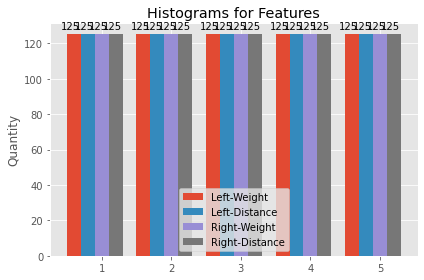

In [6]:

labels = ['1', '2', '3', '4','5']
nums = np.zeros((4,5),dtype = int)

for i in range(625):
    for j in range(4):
        nums[j][OrignalX[i][j]-1] = nums[j][OrignalX[i][j]-1]+1

x = np.arange(len(labels))*2 # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2, nums[0,:], width, label='Left-Weight')
rects2 = ax.bar(x - width, nums[1,:], width, label='Left-Distance')
rects3 = ax.bar(x , nums[2,:], width, label='Right-Weight')
rects4 = ax.bar(x + width, nums[3,:], width, label='Right-Distance')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantity')
ax.set_title('Histograms for Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 4, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

In [7]:
nums

array([[125, 125, 125, 125, 125],
       [125, 125, 125, 125, 125],
       [125, 125, 125, 125, 125],
       [125, 125, 125, 125, 125]])

##Train decision tree

In [8]:
clf = tree.DecisionTreeClassifier(max_features = 'sqrt')
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

1.0

##Draw decision tree

In [9]:
!pip install graphviz

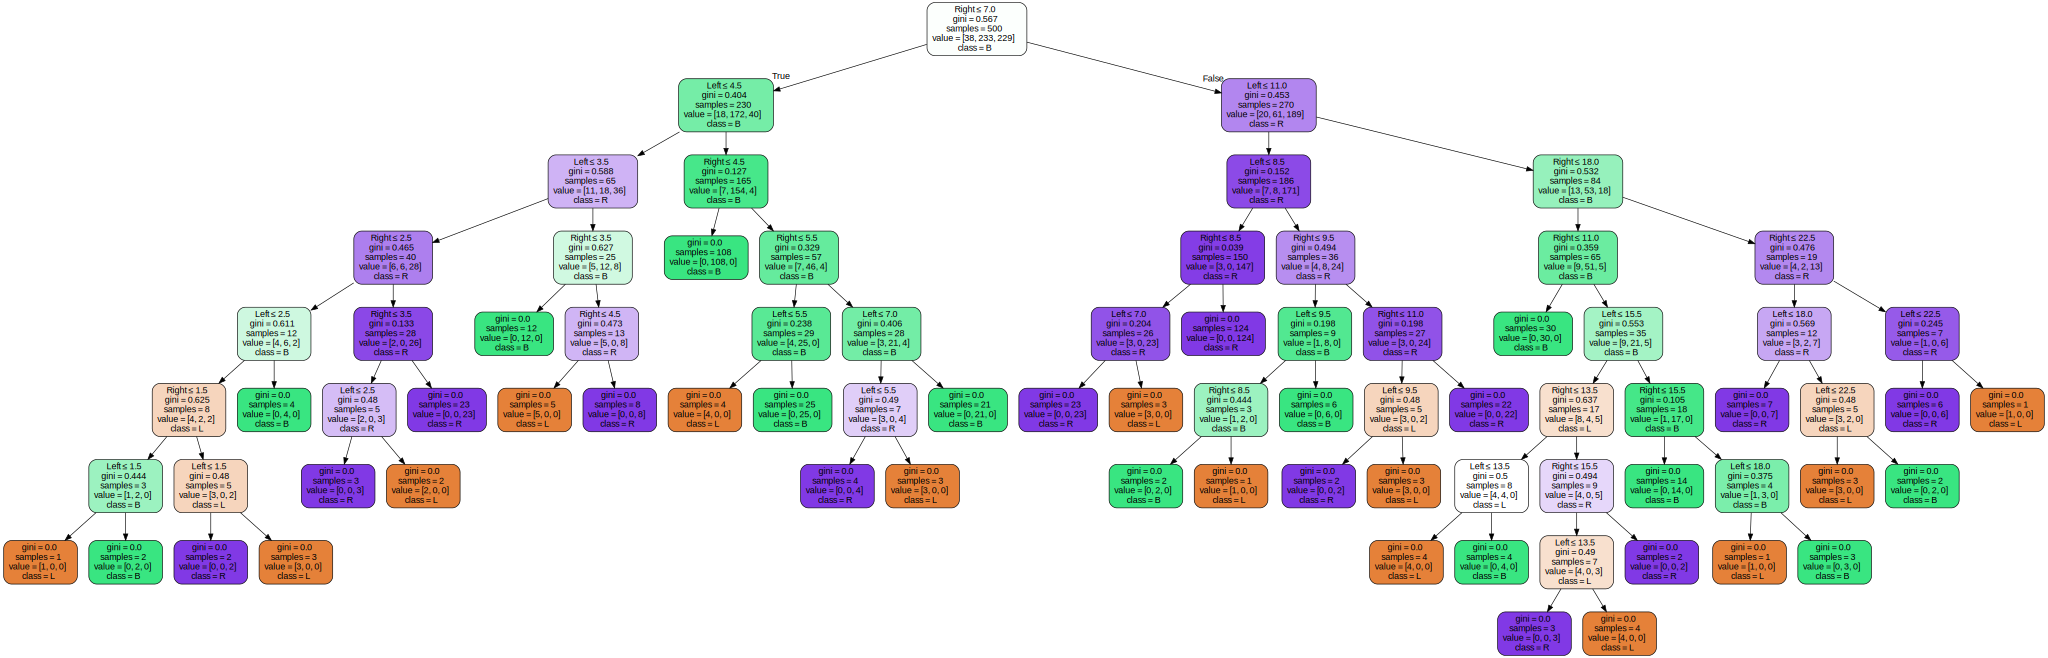

In [10]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
          feature_names=['Left','Right'],
          class_names=['L','B','R'],
          filled=True, rounded=True,
          special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("Balance_Scale_Data_Set")
graph

##Draw scatter plot matrix of features

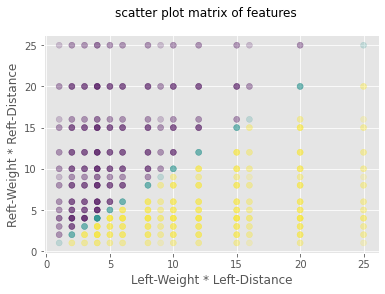

In [11]:
color = np.zeros((625))
for i in range(625):
    if y[i]=='R':
        color[i] = 1
    elif y[i]=='B' :
        color[i] = 2
    else:
        color[i] = 3
plt.scatter(Left, Right, c=color, label = y,alpha=0.2)
plt.suptitle("scatter plot matrix of features")
plt.xlabel("Left-Weight * Left-Distance")
plt.ylabel("Reft-Weight * Reft-Distance")
plt.show()

#Report

##Q: Write comment about your investigation: what features are most useful for solving the problem and why, how features are distributed in the data

- I think the four features of Left-Weight, Left-Distance, Right-Weight and Right-Distance are equally important. At the same time, based on physical knowledge that the correct way to find the class is the greater of 
(left-distance * left-weight) and (right-distance * right-weight).  If they are equal, it is balanced.

- It can be seen from the previous features histogram that the features are evenly distributed.

##Q: Analyze how they affect the quality of model.

- **criterion: {“gini”, “entropy”}, default=”gini”**


In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.984

- **splitter: {“best”, “random”}, default=”best”**

In [13]:
clf = tree.DecisionTreeClassifier(splitter = 'random')
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.984

- **max_depth: int, default=None**

In [14]:
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.888

When the depth is less than the depth at which the leaf nodes are fully expanded, the accuracy of the trained model decreases significantly.

note: In the experiment, the decision tree is fully expanded to a depth of 8.

- **min_samples_split: int or float, default=2**


In [15]:
clf = tree.DecisionTreeClassifier(min_samples_split = 2)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.984

In [16]:
clf = tree.DecisionTreeClassifier(min_samples_split = 20)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.904

The larger the minimum number of samples required to split internal nodes, the lower the accuracy.

- **min_samples_leaf: int or float, default=1**

In [17]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 1)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.984

In [18]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.88

The more the minimum number of samples required to be at a leaf node, the lower the accuracy.

- **min_weight_fraction_leaf: float, default=0.0**

In [19]:
clf = tree.DecisionTreeClassifier(min_weight_fraction_leaf = 0)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.984

In [20]:
clf = tree.DecisionTreeClassifier(min_weight_fraction_leaf = 0.25)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.64

In [21]:
clf = tree.DecisionTreeClassifier(min_weight_fraction_leaf = 0.5)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.44

The range of the smallest weighted score in the sum of the weights at all leaf nodes is 0-0.5, the larger the value, the lower the accuracy.

- **max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None**

In [22]:
clf = tree.DecisionTreeClassifier(max_features = 'auto')
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.984

In [25]:
clf = tree.DecisionTreeClassifier(max_features = 'sqrt')
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.984

In [24]:
clf = tree.DecisionTreeClassifier(max_features = 'log2')
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.984

The number of features to consider when looking for the best split :
- If “sqrt”, then max_features=sqrt(n_features), and it will have a highest accuracy.

- **random_state:int or RandomState, default=None**

In [26]:
clf = tree.DecisionTreeClassifier(random_state = 24)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.984

- **max_leaf_nodes: int, default=None**

In [37]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 30)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.968

In [38]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 10)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.888

Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. The larger the value, the lower the accuracy

- **min_impurity_decrease: float, default=0.0**

In [43]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease = 0.1)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.664

A node will be split if this split induces a decrease of the impurity greater than or equal to this value.The larger the value, the lower the accuracy

- **min_impurity_split：float, default=1e-7**

In [47]:
clf = tree.DecisionTreeClassifier(min_impurity_split = 0.5)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


0.664

Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.The larger the value, the lower the accuracy.

- **ccp_alpha: non-negative float, default=0.0**

In [50]:
clf = tree.DecisionTreeClassifier(ccp_alpha = 0.1)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.664

Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.The larger the value, the lower the accuracy.